<a href="https://colab.research.google.com/github/JayanthJakkula/Data-Science/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install seaborn


In [ ]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')

tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

print('Datasets loaded: tips (rows={}), iris (rows={})'.format(len(tips), len(iris)))

tips.head()

Datasets loaded: tips (rows=244), iris (rows=150)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


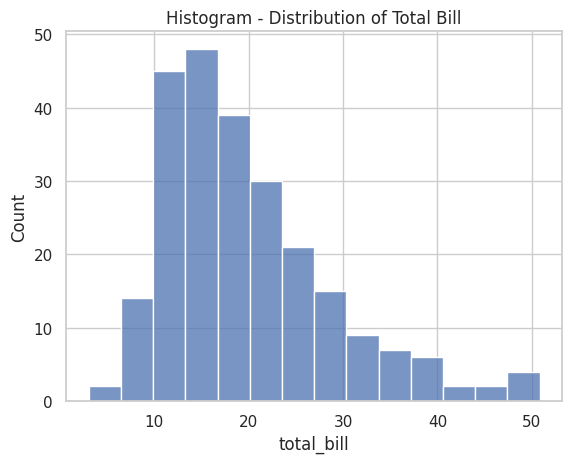

In [ ]:
sns.histplot(tips['total_bill'], kde=False)
plt.title('Histogram - Distribution of Total Bill')
plt.show()

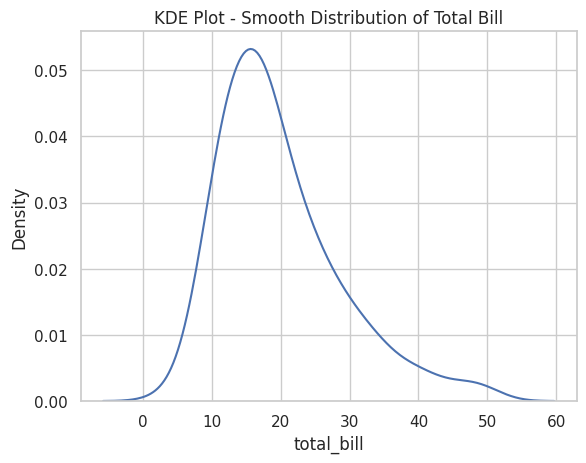

In [ ]:
# KDE Plot
sns.kdeplot(tips['total_bill'])
plt.title('KDE Plot - Smooth Distribution of Total Bill')
plt.show()

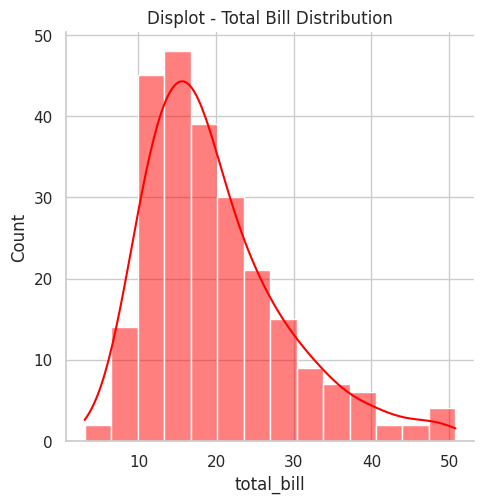

In [ ]:
# Displot (Histogram + KDE)
sns.displot(tips['total_bill'], kde=True,color='red')
plt.title('Displot - Total Bill Distribution')
plt.show()

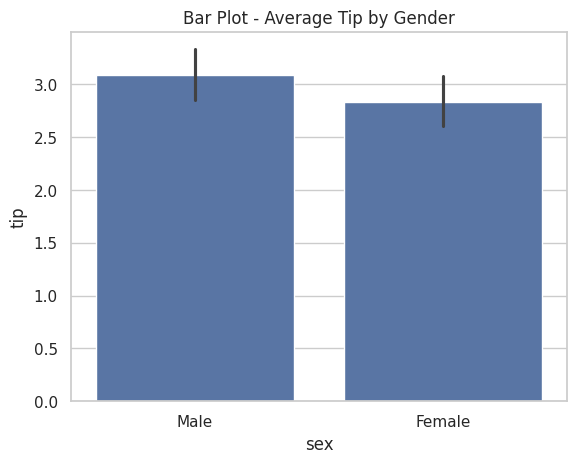

In [ ]:
# Bar Plot - Average Tip by Gender
sns.barplot(x='sex', y='tip', data=tips)
plt.title('Bar Plot - Average Tip by Gender')
plt.show()

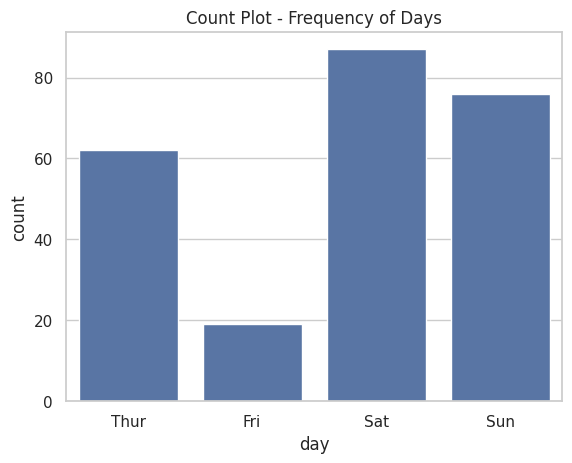

In [ ]:
# Count Plot - Frequency of Days
sns.countplot(x='day', data=tips)
plt.title('Count Plot - Frequency of Days')
plt.show()

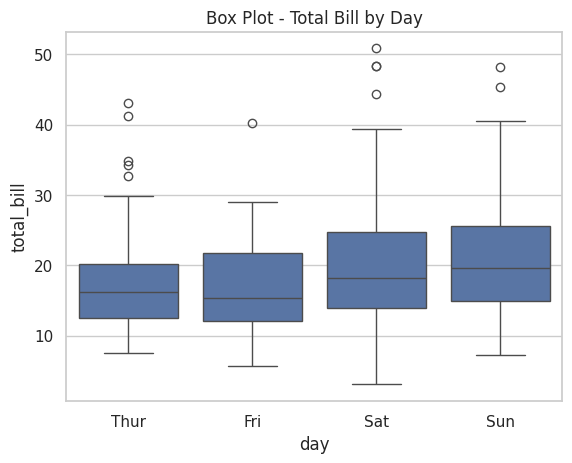

In [ ]:
# Box Plot - Total Bill by Day
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Box Plot - Total Bill by Day')
plt.show()

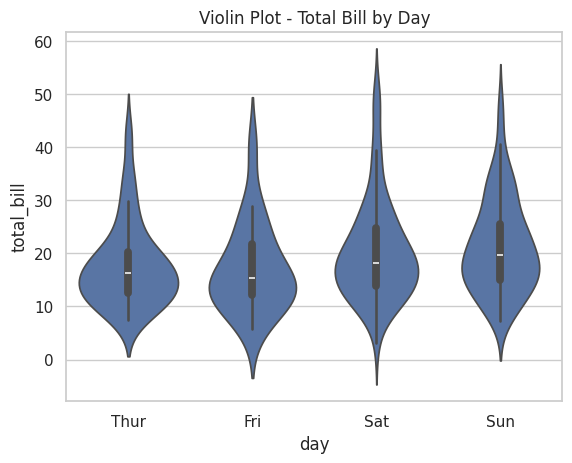

In [ ]:
# Violin Plot - Distribution + Summary
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('Violin Plot - Total Bill by Day')
plt.show()

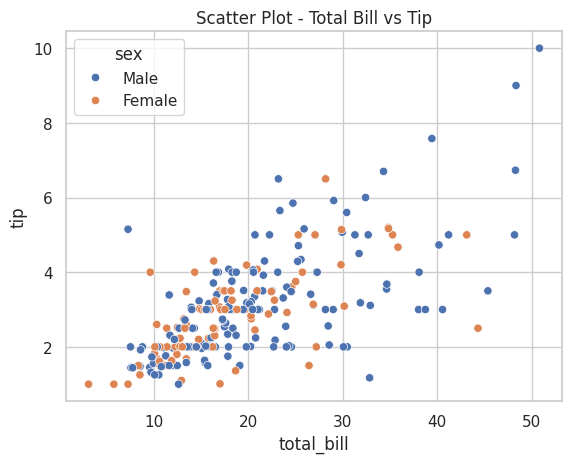

In [ ]:
# Scatter Plot - Total Bill vs Tip
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')
plt.title('Scatter Plot - Total Bill vs Tip')
plt.show()

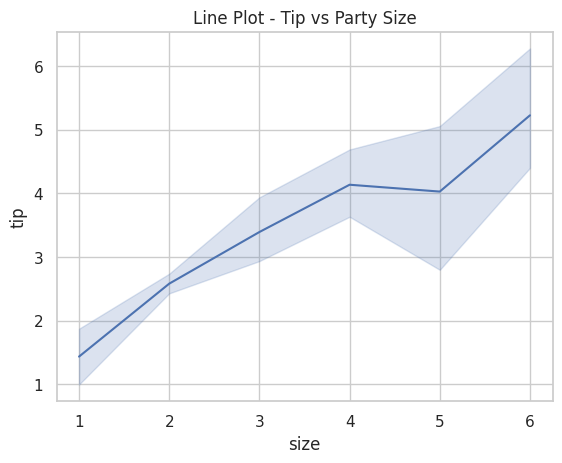

In [ ]:
# Line Plot - Tip vs Party Size (useful for trend-like visuals)
sns.lineplot(x='size', y='tip', data=tips)
plt.title('Line Plot - Tip vs Party Size')
plt.show()

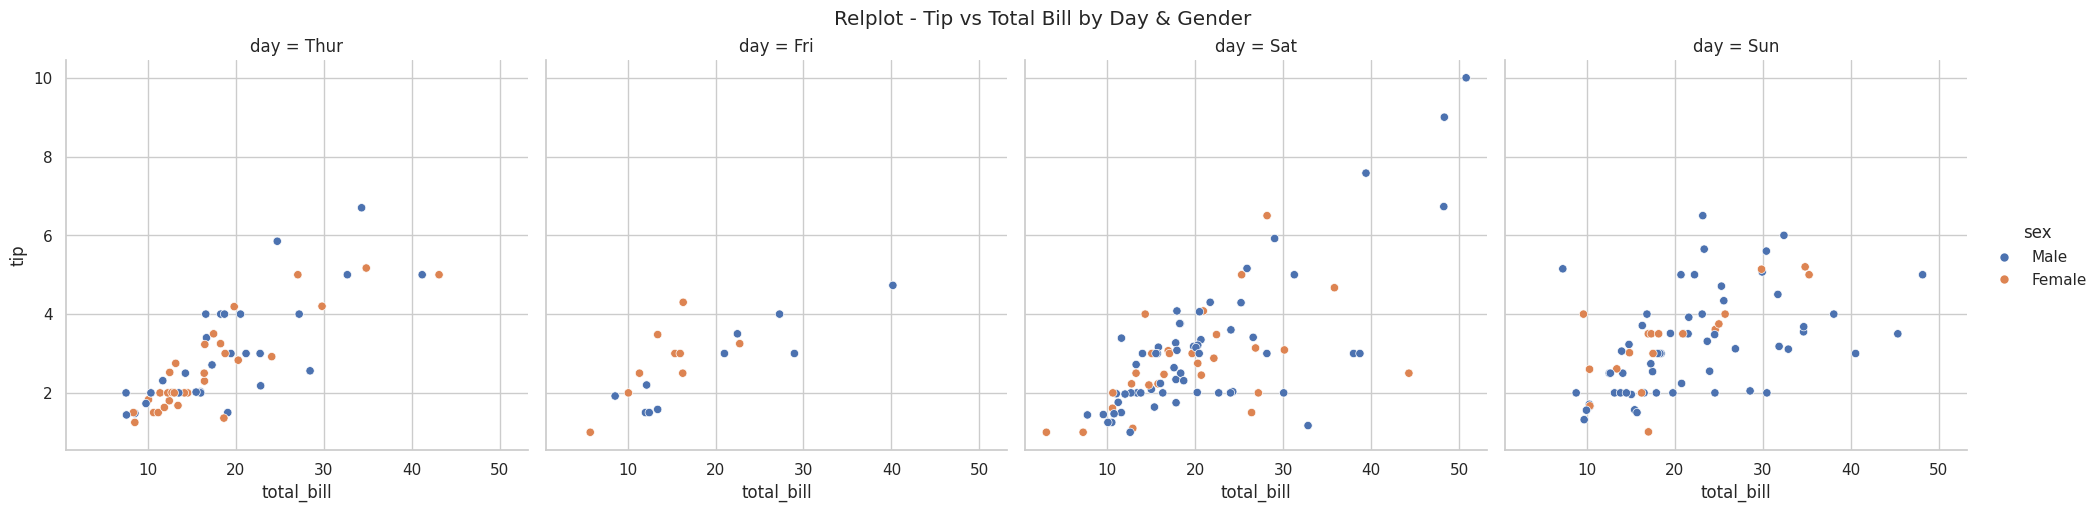

In [ ]:
# Relplot with Facets
sns.relplot(x='total_bill', y='tip', hue='sex', col='day', data=tips)
plt.suptitle('Relplot - Tip vs Total Bill by Day & Gender', y=1.02)
plt.show()

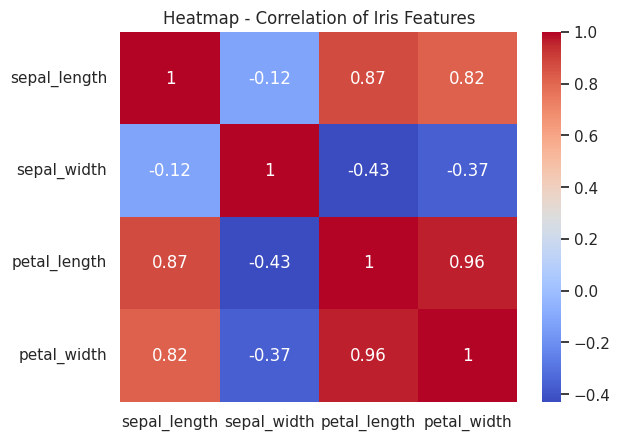

In [ ]:
# Select only numeric columns
iris_num = iris.select_dtypes(include=['float', 'int'])

# Compute correlation
corr = iris_num.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.title("Heatmap - Correlation of Iris Features")
plt.show()

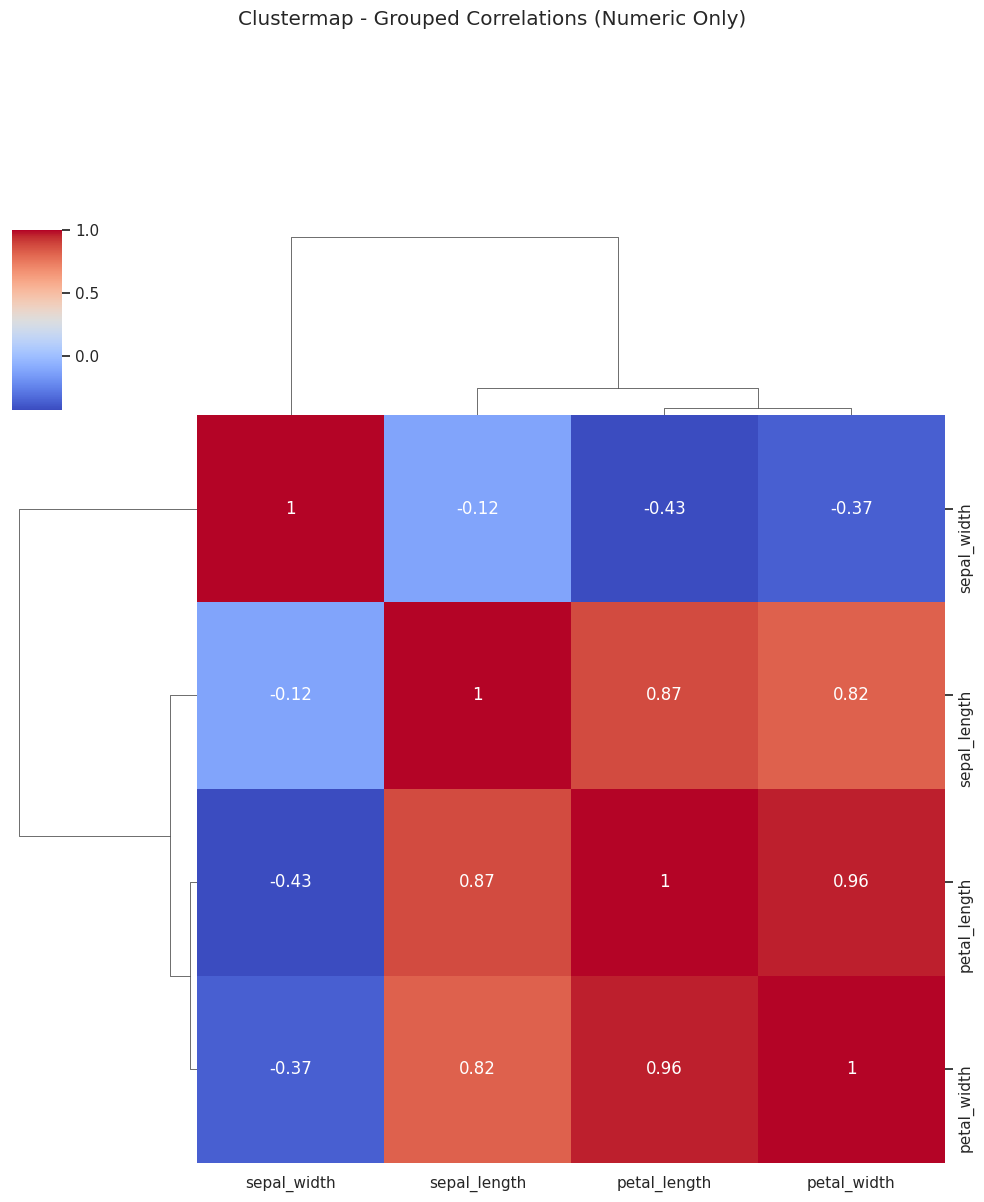

In [ ]:
# Select only numeric columns (exclude 'species')
iris_num = iris.select_dtypes(include=['float', 'int'])

# Compute correlation matrix
corr = iris_num.corr()

# Create the clustermap
sns.clustermap(corr, cmap='coolwarm', annot=True)
plt.suptitle('Clustermap - Grouped Correlations (Numeric Only)', y=1.2)
plt.show()

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Customer_support_data.csv')
print(df.head())

                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks  \
0                Life Insurance              NaN   
1  Product Specific Information              NaN   
2             Installation/demo              NaN   
3        Reverse Pickup Enquiry              NaN   
4                    Not Needed              NaN   

                               Order_id order_date_time Issue_reported at  \
0  c27c9bb4-fa36-4140-9f1f-21009254ffdb             NaN  01/08/2023 11:13   
1  d406b0c7-ce17-4654-b9de-f08d421254bd             NaN  01/08/2023 12:52   
2  c273368d-b961-

In [ ]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())


(85907, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name

In [ ]:
print(df.duplicated().sum())



0


In [ ]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


for col in numeric_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

print("Missing values after imputation:")
print(df[numeric_cols].isnull().sum())


Missing values after imputation:
Item_price                 0
connected_handling_time    0
CSAT Score                 0
dtype: int64


/tmp/ipython-input-911043094.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


In [ ]:
print(df.isnull().sum)

<bound method DataFrame.sum of        Unique id  channel_name  category  Sub-category  Customer Remarks  \
0          False         False     False         False              True   
1          False         False     False         False              True   
2          False         False     False         False              True   
3          False         False     False         False              True   
4          False         False     False         False              True   
...          ...           ...       ...           ...               ...   
85902      False         False     False         False              True   
85903      False         False     False         False             False   
85904      False         False     False         False             False   
85905      False         False     False         False              True   
85906      False         False     False         False              True   

       Order_id  order_date_time  Issue_reported at  iss

In [ ]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
# Handle missing values



object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    mode_value = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
    df[col].fillna(mode_value, inplace=True)

print("Missing values after imputation:")
print(df.isnull().sum())


/tmp/ipython-input-1661939762.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


Missing values after imputation:
Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64


In [ ]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,0
Order_id,0
order_date_time,0
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


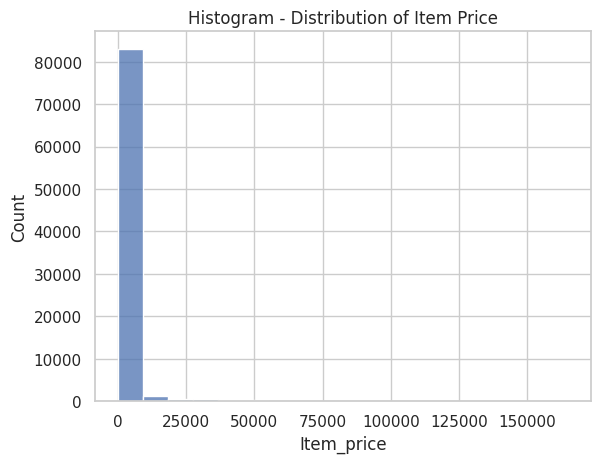

In [ ]:
# A.1 “Show me the distribution of Item_price.” → Histogram
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.histplot(df['Item_price'])
plt.title('Histogram - Distribution of Item Price')
plt.show()

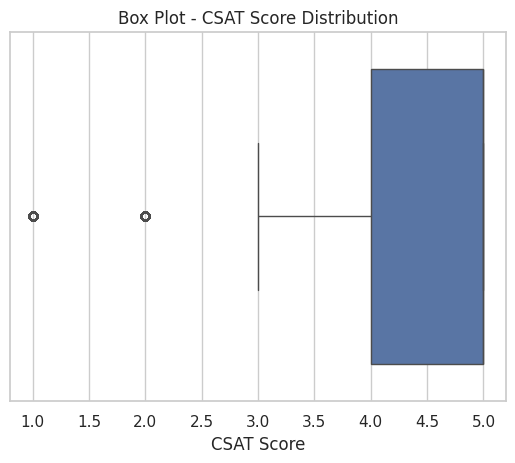

In [ ]:
#2 “How does CSAT Score vary overall?” → Boxplot
sns.boxplot(x='CSAT Score', data=df)
plt.title('Box Plot - CSAT Score Distribution')
plt.show()

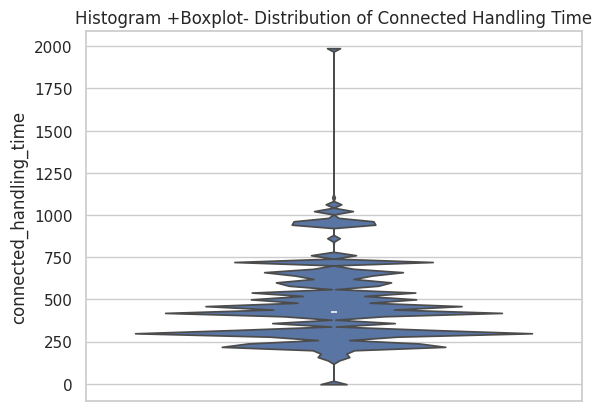

In [ ]:
#3.“What is the spread of connected_handling_time values?” → Histogram + boxplot
sns.violinplot(df['connected_handling_time'])
plt.title('Histogram +Boxplot- Distribution of Connected Handling Time')
plt.show()


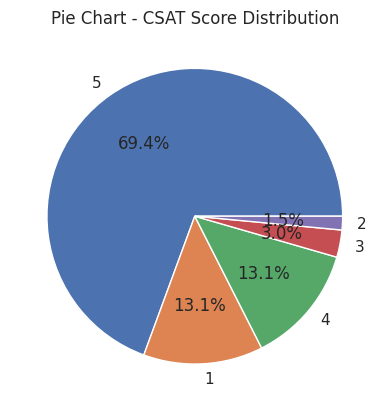

In [ ]:
# 4.Can I see a pie chart of CSAT scores by their value?” → Pie chart
csat_counts = df['CSAT Score'].value_counts()
plt.pie(csat_counts, labels=csat_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart - CSAT Score Distribution')
plt.show()

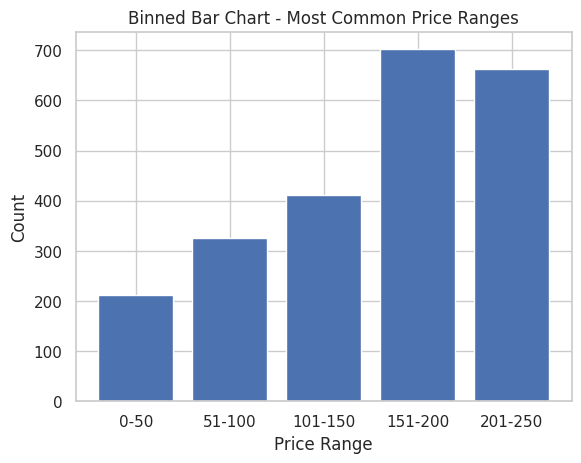

In [ ]:
#5.“What are the most common price ranges for items?” → Binned bar chart
price_bins = [0, 50, 100, 150, 200, 250]
price_labels = ['0-50', '51-100', '101-150', '151-200', '201-250']
df['Price Range'] = pd.cut(df['Item_price'], bins=price_bins, labels=price_labels, right=False)
price_range_counts = df['Price Range'].value_counts().sort_index()
plt.bar(price_range_counts.index, price_range_counts.values)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Binned Bar Chart - Most Common Price Ranges')
plt.show()


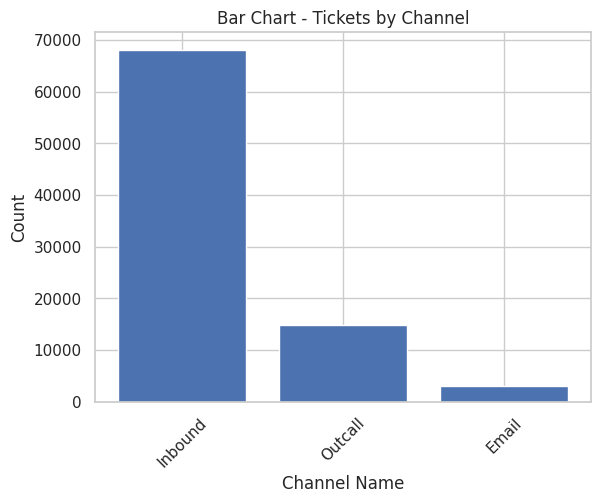

In [ ]:
#B "6.How many tickets come from each channel_name?” → Bar chart
channel_counts = df['channel_name'].value_counts()
plt.bar(channel_counts.index, channel_counts.values)
plt.xlabel('Channel Name')
plt.ylabel('Count')
plt.title('Bar Chart - Tickets by Channel')
plt.xticks(rotation=45)
plt.show()


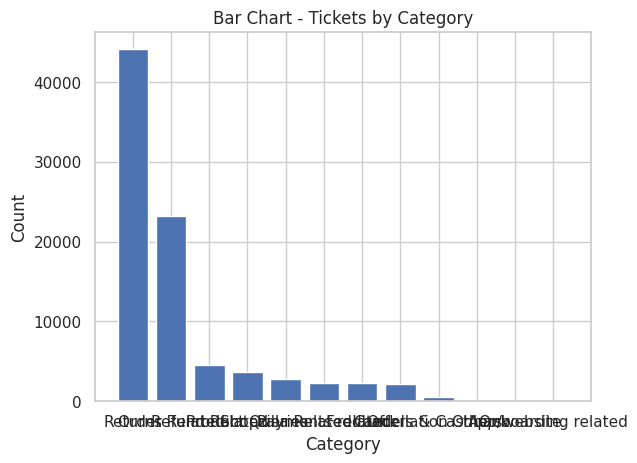

In [ ]:
# 7. 7. “Which category has the highest number of tickets?” → Bar chart (sorted)
category_counts = df['category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Chart - Tickets by Category')
plt.show()

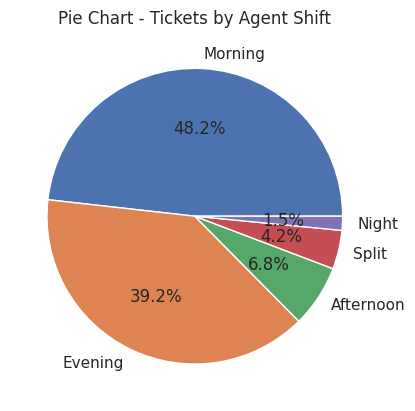

In [ ]:
# 8. “Show me the distribution of tickets by Agent Shift.” → Pie chart
agent_shift_counts = df['Agent Shift'].value_counts()
plt.pie(agent_shift_counts, labels=agent_shift_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart - Tickets by Agent Shift')
plt.show()

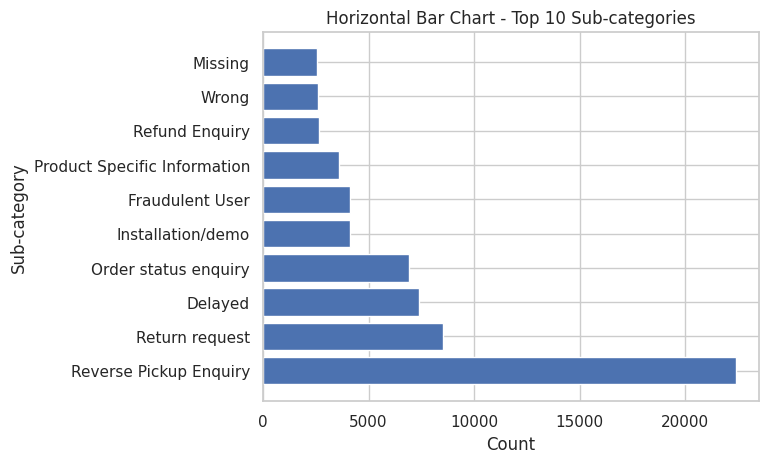

In [ ]:
# 9. “What are the top 10 Sub-category values?” → Horizontal bar chart
sub_category_counts = df['Sub-category'].value_counts().head(10)
plt.barh(sub_category_counts.index, sub_category_counts.values)
plt.xlabel('Count')
plt.ylabel('Sub-category')
plt.title('Horizontal Bar Chart - Top 10 Sub-categories')
plt.show()


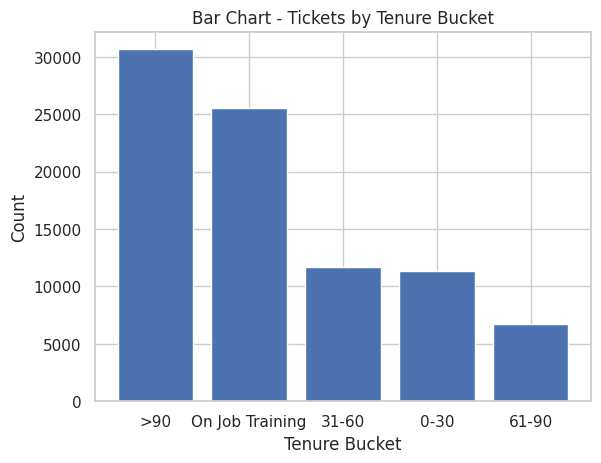

In [ ]:
# 10. “How many tickets belong to each Tenure Bucket?” → Bar chart
tenure_bucket_counts = df['Tenure Bucket'].value_counts()
plt.bar(tenure_bucket_counts.index, tenure_bucket_counts.values)
plt.xlabel('Tenure Bucket')
plt.ylabel('Count')
plt.title('Bar Chart - Tickets by Tenure Bucket')
plt.show()

